<b><font size="5">Import relevant libraries and dataframes</font><a class="anchor"><a id='toc'></a></b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

In [52]:
wm_cleaned = pd.read_csv(r'data\WineMatters_cleaned.csv')
wm_cleaned.set_index('WineID', inplace = True)
wm_cleaned.head()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,...,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single,Satisfaction_General
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,0,0.0,0,5,0,2,2,4,...,0,0,3,3,2,0,1,0,1,1
2,47,2464,310,305.0,4,2,0,3,0,2,...,0,0,4,3,2,1,0,0,1,1
3,15,2138,0,0.0,3,4,0,3,2,0,...,0,0,4,4,2,0,1,0,1,1
4,60,623,0,0.0,0,4,0,3,3,4,...,0,0,1,1,3,0,1,0,1,0
5,70,354,0,0.0,0,4,0,3,4,3,...,0,0,2,2,5,0,1,0,1,1


In [58]:
wm_scaled = pd.read_csv(r'data\WineMatters_scaled.csv')
wm_scaled.head()

,Unnamed: 0,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,...,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal,Sulphites_Presence,Type_White,Barrel_Wooden,Grapes_Single
0,1,0.743590,0.034003,0.000000,0.000000,0.0,5.0,0.0,2.0,2.0,...,3.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0
1,2,0.512821,0.381781,0.707763,0.693182,4.0,2.0,0.0,3.0,0.0,...,4.0,0.0,0.0,4.0,3.0,2.0,1.0,0.0,0.0,1.0
2,3,0.102564,0.330223,0.000000,0.000000,3.0,4.0,0.0,3.0,2.0,...,3.0,0.0,0.0,4.0,4.0,2.0,0.0,1.0,0.0,1.0
3,4,0.679487,0.090622,0.000000,0.000000,0.0,4.0,0.0,3.0,3.0,...,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0
4,5,0.807692,0.048078,0.000000,0.000000,0.0,4.0,0.0,3.0,4.0,...,2.0,0.0,0.0,2.0,2.0,5.0,0.0,1.0,0.0,1.0


In [59]:
wm_flavfeel = pd.read_csv(r'data\WineMatters_flavfeel.csv')
wm_flavfeel.set_index('WineID', inplace = True)
wm_flavfeel.head()

,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Cloudiness,Alcohol,Astringency
WineID,,,,,,,,,,,
1,0.0,0,5,0,2,2,4,2,3,0,0
2,305.0,4,2,0,3,0,2,2,4,0,0
3,0.0,3,4,0,3,2,0,2,3,0,0
4,0.0,0,4,0,3,3,4,3,1,0,0
5,0.0,0,4,0,3,4,3,4,2,0,0


In [60]:
wm_prodchar = pd.read_csv(r'data\WineMatters_prodchar.csv')
wm_prodchar.set_index('WineID', inplace = True)
wm_prodchar.head()

,Aging_Time,Litters_Barrel,Type_White,Magnesium,Sulphites_Presence,Barrel_Wooden,Grapes_Single,Color_Intensity
WineID,,,,,,,,
1,65,265,1,0,0,0,1,3
2,47,2464,0,310,1,0,1,3
3,15,2138,1,0,0,0,1,2
4,60,623,1,0,0,0,1,1
5,70,354,1,0,0,0,1,2


<b><font size="5">K-Means - wm_flavfeel</font><a class="anchor"><a id='toc'></a></b>

<b><font size="4">wm_flavfeel - Elbow Method</font><a class="anchor"><a id='toc'></a></b>

In [6]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(wm_flavfeel)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

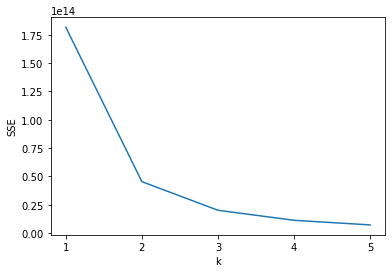

In [7]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

You can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

<b><font size="4">wm_flavfeel - Dendogram</font><a class="anchor"><a id='toc'></a></b>

In [8]:
#hclustering = linkage(wm_flavfeel, 'single') # nearest point
#hclustering = linkage(wm_flavfeel, 'complete') # most far away point
#hclustering = linkage(wm_flavfeel, 'average') # centroid
#hclustering = linkage(wm_flavfeel, 'ward') # common method

The dendogram method can't be executed due its big nature (reason for the error). That is why we will only use the Elbow Method.

<b><font size="4">wm_flavfeel - Apply K-Means</font><a class="anchor"><a id='toc'></a></b>

In [9]:
model = KMeans(n_clusters=3)

In [10]:
model.fit(wm_flavfeel)

KMeans(n_clusters=3)

In [11]:
wm_flavfeel['label'] = model.labels_
wm_flavfeel

,WineID,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Cloudiness,Alcohol,Astringency,label
0,1,0.0,0,5,0,2,2,4,2,3,0,0,1
1,2,305.0,4,2,0,3,0,2,2,4,0,0,1
2,3,0.0,3,4,0,3,2,0,2,3,0,0,1
3,4,0.0,0,4,0,3,3,4,3,1,0,0,1
4,5,0.0,0,4,0,3,4,3,4,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129305,129876,0.0,3,4,5,3,2,5,2,3,5,5,2
129306,129877,172.0,3,1,2,4,2,1,1,2,2,3,2
129307,129878,163.0,3,2,3,3,3,2,2,4,3,0,2
129308,129879,205.0,2,2,3,2,3,2,2,3,3,2,2


<b><font size="4">wm_flavfeel - Exploring Results</font><a class="anchor"><a id='toc'></a></b>

In [12]:
descr = wm_flavfeel.reset_index(drop=True)
descr = descr.groupby(['label']).describe().transpose()
descr

label                         0             1              2
WineID      count  43124.000000  43217.000000   42969.000000
            mean   65096.421366  21745.152625  108312.397938
            std    12491.881005  12541.704558   12451.700699
            min    43458.000000      1.000000   86742.000000
            25%    54280.750000  10892.000000   97531.000000
...                         ...           ...            ...
Astringency min        0.000000      0.000000       0.000000
            25%        2.000000      2.000000       2.000000
            50%        3.000000      4.000000       3.000000
            75%        4.000000      5.000000       4.000000
            max        5.000000      5.000000       5.000000

[96 rows x 3 columns]

The distribution of the clusters are not similar (i.e. 112825 to 138181 to 2667). Remember that every time we do the clustering there could be new counts.

<b><font size="4">wm_flavfeel - Visualizing Results with histograms</font><a class="anchor"><a id='toc'></a></b>

In [13]:
cluster0 = wm_flavfeel[wm_flavfeel.label==0]
cluster1 = wm_flavfeel[wm_flavfeel.label==1]
cluster2 = wm_flavfeel[wm_flavfeel.label==2]

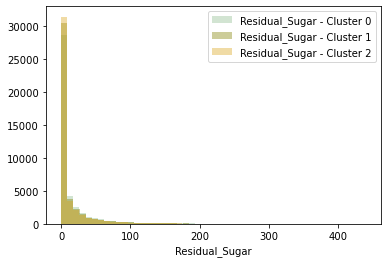

In [14]:
sns.distplot(cluster0['Residual_Sugar'],color='darkseagreen',label='Residual_Sugar - Cluster 0', kde = False)
sns.distplot(cluster1['Residual_Sugar'],color='olive',label='Residual_Sugar - Cluster 1', kde = False)
sns.distplot(cluster2['Residual_Sugar'],color='goldenrod',label='Residual_Sugar - Cluster 2', kde = False)
plt.legend()

As we can see here there are a lot of values that are near zero (more than 70000). That explains the one big cluster and the other relative smaller clusters. 

To see the distribution better we crop the graph and max it out at 1400.

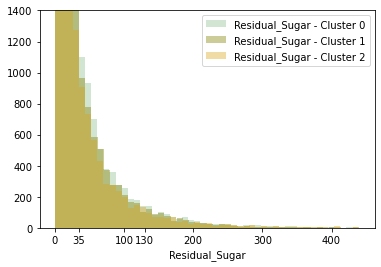

In [15]:
sns.distplot(cluster0['Residual_Sugar'],color='darkseagreen',label='Residual_Sugar - Cluster 0', kde = False)
sns.distplot(cluster1['Residual_Sugar'],color='olive',label='Residual_Sugar - Cluster 1', kde = False)
sns.distplot(cluster2['Residual_Sugar'],color='goldenrod',label='Residual_Sugar - Cluster 2', kde = False)
plt.yticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
plt.xticks([0, 35, 100, 130, 200, 300, 400])
plt.ylim(0, 1400)
plt.legend()

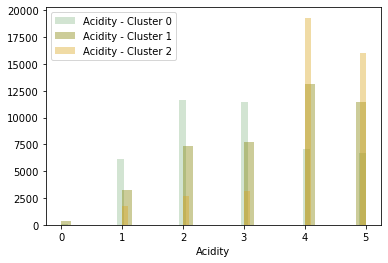

In [16]:
sns.distplot(cluster0['Acidity'],color='darkseagreen',label='Acidity - Cluster 0', kde = False)
sns.distplot(cluster1['Acidity'],color='olive',label='Acidity - Cluster 1', kde = False)
sns.distplot(cluster2['Acidity'],color='goldenrod',label='Acidity - Cluster 2', kde = False)
plt.legend()

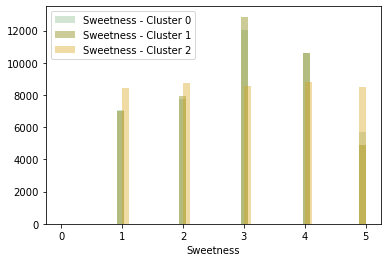

In [17]:
sns.distplot(cluster0['Sweetness'],color='darkseagreen',label='Sweetness - Cluster 0', kde = False)
sns.distplot(cluster1['Sweetness'],color='olive',label='Sweetness - Cluster 1', kde = False)
sns.distplot(cluster2['Sweetness'],color='goldenrod',label='Sweetness - Cluster 2', kde = False)
plt.legend()

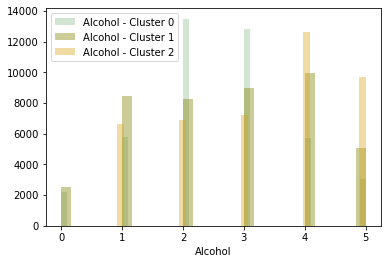

In [18]:
sns.distplot(cluster0['Alcohol'],color='darkseagreen',label='Alcohol - Cluster 0', kde = False)
sns.distplot(cluster1['Alcohol'],color='olive',label='Alcohol - Cluster 1', kde = False)
sns.distplot(cluster2['Alcohol'],color='goldenrod',label='Alcohol - Cluster 2', kde = False)
plt.legend()

In [19]:
wm_flavfeel['Residual_Sugar'].value_counts()

0.0      72692
1.0       2747
2.0       2585
3.0       2438
4.0       2371
         ...  
420.0        1
418.0        1
344.0        1
269.0        1
353.0        1
Name: Residual_Sugar, Length: 409, dtype: int64

Because all variables except Residual Sugar are on a scale from 0-5, Residual Sugar has the most influence on the clustering because of it overwhelming number of  values close to 0 and below 35.

<b><font size="4">wm_flavfeel - Visualizing Results with scatter-plots</font><a class="anchor"><a id='toc'></a></b>

In [20]:
# Obtaining coordinates of the centroids 
centroids = model.cluster_centers_
centroids

array([[6.51461044e+04, 1.65696464e+01, 2.91167536e+00, 2.99336812e+00,
        2.89157101e+00, 3.00428986e+00, 2.89168696e+00, 2.96313043e+00,
        2.98692174e+00, 2.84310725e+00, 2.53977971e+00, 2.75371594e+00],
       [2.17697709e+04, 1.44150834e+01, 3.49290436e+00, 3.43724865e+00,
        2.61960893e+00, 2.96343549e+00, 3.19243748e+00, 3.03651828e+00,
        3.41244857e+00, 3.51493089e+00, 2.70549623e+00, 3.22347802e+00],
       [1.08337499e+05, 1.32771966e+01, 4.05570959e+00, 3.59246488e+00,
        3.04820709e+00, 3.00386775e+00, 3.66672103e+00, 4.15741280e+00,
        4.16491531e+00, 4.04091428e+00, 3.27468021e+00, 2.99147231e+00]])

In [21]:
# Extracting individual values to plot in a scatter plot
centroid_0_Residual_Sugar = centroids[0,6]
centroid_1_Residual_Sugar = centroids[1,6]
centroid_2_Residual_Sugar = centroids[2,6]
centroid_0_Astringency = centroids[0,7]
centroid_1_Astringency = centroids[1,7]
centroid_2_Astringency = centroids[2,7]

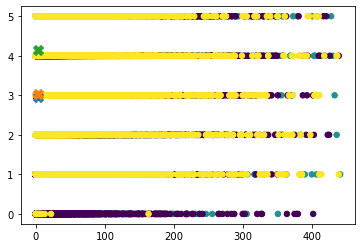

In [22]:
plt.scatter(wm_flavfeel.Residual_Sugar, wm_flavfeel.Astringency, c=wm_flavfeel.label, s=30)
plt.scatter(centroid_0_Residual_Sugar, centroid_0_Astringency, marker='X', s=100)
plt.scatter(centroid_1_Residual_Sugar, centroid_1_Astringency, marker='X', s=100)
plt.scatter(centroid_2_Residual_Sugar, centroid_2_Astringency, marker='X', s=100)
plt.show()

For all relationships between the variables with Residual_Sugar the centroid are always in the first big cluster.

Therefore, there are no semantic grouping and so the scatter-plot is not a good graph to use here. 

<b><font size="5">K-Means - wm_prodchar</font><a class="anchor"><a id='toc'></a></b>

<b><font size="4">wm_prodchar - Elbow Method</font><a class="anchor"><a id='toc'></a></b>

In [23]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(wm_prodchar)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

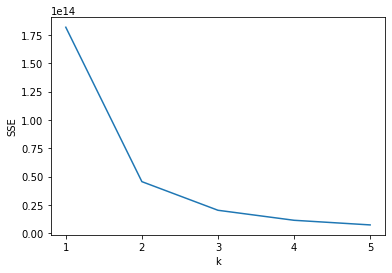

In [24]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

You can see from the graph that 3 seems to be a good number of clusters, since this is the point where the inertia (or the sum squared of errors) begins to decrease more slowly.

We also don't use the the dendogram method here because it can't be executed due its big nature (reason for the error). That is why we will only use the Elbow Method.

<b><font size="4">wm_prodchar - Apply K-Means</font><a class="anchor"><a id='toc'></a></b>

In [25]:
model = KMeans(n_clusters=3)

In [26]:
model.fit(wm_prodchar)

KMeans(n_clusters=3)

In [27]:
wm_prodchar['label'] = model.labels_
wm_prodchar

,WineID,Aging_Time,Litters_Barrel,Type_White,Magnesium,Sulphites_Presence,Barrel_Wooden,Grapes_Single,Color_Intensity,label
0,1,65,265,1,0,0,0,1,3,0
1,2,47,2464,0,310,1,0,1,3,0
2,3,15,2138,1,0,0,0,1,2,0
3,4,60,623,1,0,0,0,1,1,0
4,5,70,354,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
129305,129876,29,1731,1,0,0,1,1,2,1
129306,129877,63,2087,0,174,1,1,1,3,1
129307,129878,69,2320,0,155,0,1,1,4,1
129308,129879,66,2450,0,193,0,1,1,3,1


<b><font size="4">wm_prodchar - Exploring Results</font><a class="anchor"><a id='toc'></a></b>

In [28]:
descr = wm_prodchar.reset_index(drop=True)
descr = descr.groupby(['label']).describe().transpose()
descr

label                             0              1             2
WineID          count  43251.000000   42934.000000  43125.000000
                mean   21762.234654  108329.968370  65131.049043
                std    12551.557935   12441.552411  12492.179943
                min        1.000000   86777.000000  43492.000000
                25%    10900.500000   97557.250000  54315.000000
...                             ...            ...           ...
Color_Intensity min        1.000000       1.000000      0.000000
                25%        2.000000       4.000000      2.000000
                50%        4.000000       4.000000      3.000000
                75%        5.000000       5.000000      3.000000
                max        5.000000       5.000000      5.000000

[72 rows x 3 columns]

The distribution for wm_prodchar is fairly even compared to wm_flavfeel. 

Cluster 0 is the biggest with more than doubled the amount to the next biggest cluster.

<b><font size="4">wm_prodchar - Visualizing Results with histograms</font><a class="anchor"><a id='toc'></a></b>

In [29]:
cluster0 = wm_prodchar[wm_prodchar.label==0]
cluster1 = wm_prodchar[wm_prodchar.label==1]
cluster2 = wm_prodchar[wm_prodchar.label==2]

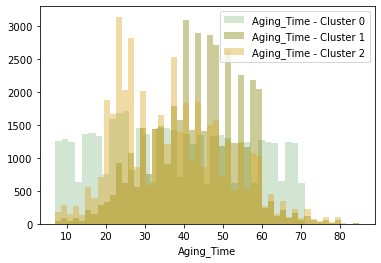

In [30]:
sns.distplot(cluster0['Aging_Time'],color='darkseagreen',label='Aging_Time - Cluster 0', kde = False)
sns.distplot(cluster1['Aging_Time'],color='olive',label='Aging_Time - Cluster 1', kde = False)
sns.distplot(cluster2['Aging_Time'],color='goldenrod',label='Aging_Time - Cluster 2', kde = False)
plt.legend()

Cluster 0 doesn't have that long of an Aging Time, while Cluster 2 has a longer Aging Time than the other clusters.

<b><font size="7">Check Litters_Barrel again!!</font><a class="anchor"><a id='toc'></a></b>

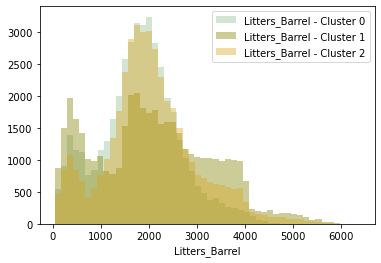

In [31]:
sns.distplot(cluster0['Litters_Barrel'],color='darkseagreen',label='Litters_Barrel - Cluster 0', kde = False)
sns.distplot(cluster1['Litters_Barrel'],color='olive',label='Litters_Barrel - Cluster 1', kde = False)
sns.distplot(cluster2['Litters_Barrel'],color='goldenrod',label='Litters_Barrel - Cluster 2', kde = False)
plt.legend()

The variable Litters_Barrel is perfectly distributed. That can be an indication that Litters_Barrel influenced the clustering the most.

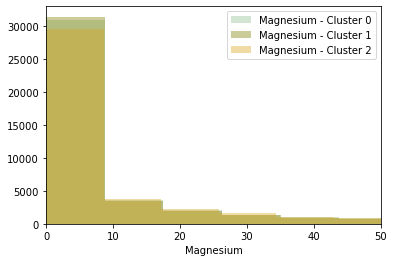

In [32]:
sns.distplot(cluster0['Magnesium'],color='darkseagreen',label='Magnesium - Cluster 0', kde = False)
sns.distplot(cluster1['Magnesium'],color='olive',label='Magnesium - Cluster 1', kde = False)
sns.distplot(cluster2['Magnesium'],color='goldenrod',label='Magnesium - Cluster 2', kde = False)
plt.xlim(0, 50)
plt.legend()

For Cluster 0 and 1 most of the values are up to 10, while 

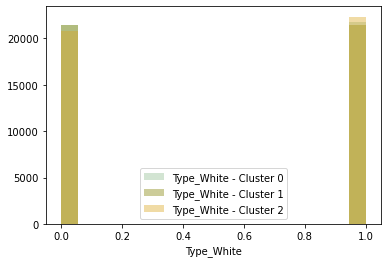

In [33]:
sns.distplot(cluster0['Type_White'],color='darkseagreen',label='Type_White - Cluster 0', kde = False)
sns.distplot(cluster1['Type_White'],color='olive',label='Type_White - Cluster 1', kde = False)
sns.distplot(cluster2['Type_White'],color='goldenrod',label='Type_White - Cluster 2', kde = False)
plt.legend()

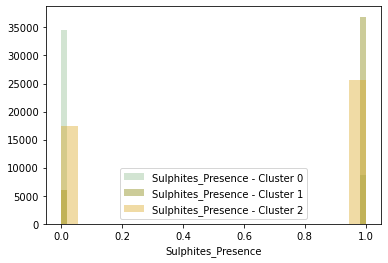

In [34]:
sns.distplot(cluster0['Sulphites_Presence'],color='darkseagreen',label='Sulphites_Presence - Cluster 0', kde = False)
sns.distplot(cluster1['Sulphites_Presence'],color='olive',label='Sulphites_Presence - Cluster 1', kde = False)
sns.distplot(cluster2['Sulphites_Presence'],color='goldenrod',label='Sulphites_Presence - Cluster 2', kde = False)
plt.legend()

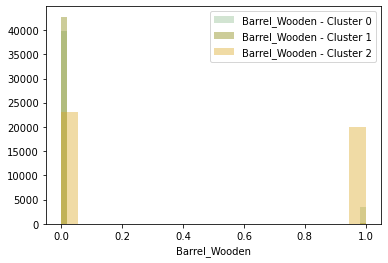

In [35]:
sns.distplot(cluster0['Barrel_Wooden'],color='darkseagreen',label='Barrel_Wooden - Cluster 0', kde = False)
sns.distplot(cluster1['Barrel_Wooden'],color='olive',label='Barrel_Wooden - Cluster 1', kde = False)
sns.distplot(cluster2['Barrel_Wooden'],color='goldenrod',label='Barrel_Wooden - Cluster 2', kde = False)
plt.legend()

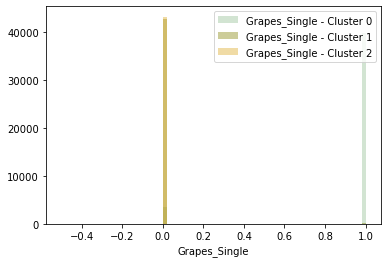

In [36]:
sns.distplot(cluster0['Grapes_Single'],color='darkseagreen',label='Grapes_Single - Cluster 0', kde = False)
sns.distplot(cluster1['Grapes_Single'],color='olive',label='Grapes_Single - Cluster 1', kde = False)
sns.distplot(cluster2['Grapes_Single'],color='goldenrod',label='Grapes_Single - Cluster 2', kde = False)
plt.legend()

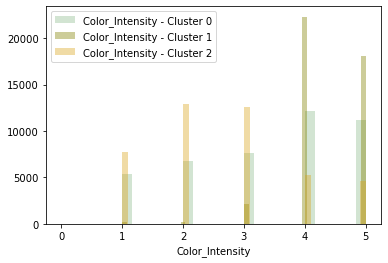

In [37]:
sns.distplot(cluster0['Color_Intensity'],color='darkseagreen',label='Color_Intensity - Cluster 0', kde = False)
sns.distplot(cluster1['Color_Intensity'],color='olive',label='Color_Intensity - Cluster 1', kde = False)
sns.distplot(cluster2['Color_Intensity'],color='goldenrod',label='Color_Intensity - Cluster 2', kde = False)
plt.legend()

<b><font size="4">wm_prodchar - Visualizing Results with scatterplots</font><a class="anchor"><a id='toc'></a></b>

Obtain the coordinates of the centroids using the `.cluster_centers_` attribute of `model`.  Assign them to `centroids`.

__NOTE: The values obtained can be different each time you run the algorithm, due to the fact that distinct initial seeds can lead to different solutions.__ <br><br>

In [38]:
centroids = model.cluster_centers_
centroids

array([[ 2.17938871e+04,  3.77075541e+01,  1.81003382e+03,
         5.04363485e-01,  1.39496006e+01,  2.02659648e-01,
         8.22828647e-02,  9.17717135e-01,  3.39275985e+00],
       [ 1.08360591e+05,  4.36699088e+01,  2.08376939e+03,
         5.00268234e-01,  1.30675483e+01,  8.59258741e-01,
         4.64161594e-03,  4.75823945e-03,  4.35280946e+00],
       [ 6.51932775e+04,  3.69445308e+01,  2.04451128e+03,
         5.17705169e-01,  1.59011432e+01,  5.95459500e-01,
         4.62212740e-01, -2.58126853e-14,  2.67745751e+00]])

<b><font size="3">Aging_Time and Litters_Barrel</font><a class="anchor"><a id='toc'></a></b>

In [39]:
centroid_0_Aging_Time = centroids[0,0]
centroid_1_Aging_Time = centroids[1,0]
centroid_2_Aging_Time = centroids[2,0]
centroid_0_Litters_Barrel = centroids[0,1]
centroid_1_Litters_Barrel = centroids[1,1]
centroid_2_Litters_Barrel = centroids[2,1]

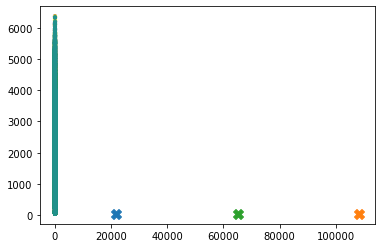

In [40]:
plt.scatter(wm_prodchar.Aging_Time, wm_prodchar.Litters_Barrel, c=wm_prodchar.label, s=10)
plt.scatter(centroid_0_Aging_Time, centroid_0_Litters_Barrel, marker='X', s=100)
plt.scatter(centroid_1_Aging_Time, centroid_1_Litters_Barrel, marker='X', s=100)
plt.scatter(centroid_2_Aging_Time, centroid_2_Litters_Barrel, marker='X', s=100)
plt.show()

One observation is that the lowest amount of Litter_Barrels has a larger Aging_Time.

<b><font size="3">Aging_Time and Magnesium</font><a class="anchor"><a id='toc'></a></b>

In [41]:
centroid_0_Aging_Time = centroids[0,0]
centroid_1_Aging_Time = centroids[1,0]
centroid_2_Aging_Time = centroids[2,0]
centroid_0_Magnesium = centroids[0,1]
centroid_1_Magnesium = centroids[1,1]
centroid_2_Magnesium = centroids[2,1]

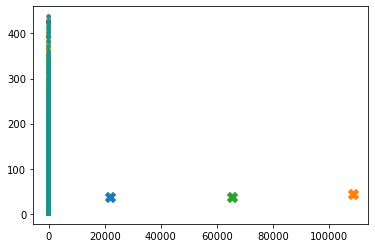

In [42]:
plt.scatter(wm_prodchar.Aging_Time, wm_prodchar.Magnesium, c=wm_prodchar.label, s=10)
plt.scatter(centroid_0_Aging_Time, centroid_0_Magnesium, marker='X', s=100)
plt.scatter(centroid_1_Aging_Time, centroid_1_Magnesium, marker='X', s=100)
plt.scatter(centroid_2_Aging_Time, centroid_2_Magnesium, marker='X', s=100)
plt.show()

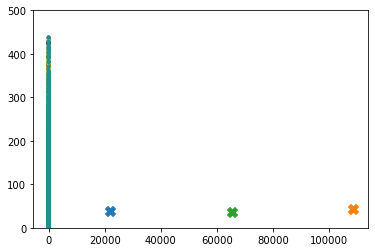

In [43]:
plt.scatter(wm_prodchar.Aging_Time, wm_prodchar.Magnesium, c=wm_prodchar.label, s=10)
plt.scatter(centroid_0_Aging_Time, centroid_0_Magnesium, marker='X', s=100)
plt.scatter(centroid_1_Aging_Time, centroid_1_Magnesium, marker='X', s=100)
plt.scatter(centroid_2_Aging_Time, centroid_2_Magnesium, marker='X', s=100)
plt.ylim(0, 500)
plt.show()

# What is the observation?

<b><font size="3">Magnesium and Litters_Barrel</font><a class="anchor"><a id='toc'></a></b>

In [44]:
centroid_0_Magnesium = centroids[0,0]
centroid_1_Magnesium = centroids[1,0]
centroid_2_Magnesium = centroids[2,0]
centroid_0_Litters_Barrel = centroids[0,1]
centroid_1_Litters_Barrel = centroids[1,1]
centroid_2_Litters_Barrel = centroids[2,1]

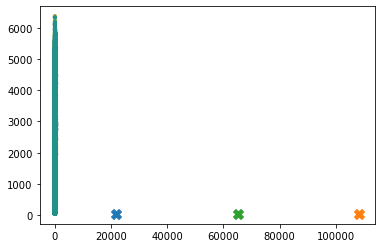

In [45]:
plt.scatter(wm_prodchar.Magnesium, wm_prodchar.Litters_Barrel, c=wm_prodchar.label, s=10)
plt.scatter(centroid_0_Magnesium, centroid_0_Litters_Barrel, marker='X', s=100)
plt.scatter(centroid_1_Magnesium, centroid_1_Litters_Barrel, marker='X', s=100)
plt.scatter(centroid_2_Magnesium, centroid_2_Litters_Barrel, marker='X', s=100)
plt.show()

# What is the observation?